## MNIST Sample

Keras MNIST sample

- dataset: http://yann.lecun.com/exdb/mnist/
- source reference: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

This sample demonstrates:

- basic CNN models and how it is constructed
- interactive test using mouse control

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12
save_dir = os.path.abspath('../models')
model_name = 'sample_mnist_model.h5'

In [3]:
# data preparation

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# modeling
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
# training
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.2546 - acc: 0.9213 - val_loss: 0.0584 - val_acc: 0.9805
Epoch 2/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.0869 - acc: 0.9739 - val_loss: 0.0407 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0662 - acc: 0.9801 - val_loss: 0.0397 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0538 - acc: 0.9835 - val_loss: 0.0335 - val_acc: 0.9885
Epoch 5/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0479 - acc: 0.9856 - val_loss: 0.0304 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0429 - acc: 0.9871 - val_loss: 0.0276 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0381 - acc: 0.9884 - val_loss: 0.0279 -

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0


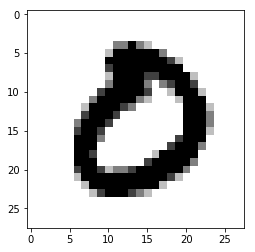

In [8]:
test_sample = 4002
plt.imshow(x_train[test_sample].reshape(28,28), cmap="gray_r")
#plt.axis('off')
print(y_train[test_sample], np.argmax( y_train[test_sample] ))

In [9]:
x = x_train[test_sample]
x = np.expand_dims(x, axis=0)
print(x.shape) # (1, 28, 28)
y_pred = model.predict(x)
print(y_pred, np.argmax( y_pred ))

(1, 28, 28, 1)
[[9.9999976e-01 7.8406731e-10 1.1975330e-07 5.2105140e-11 3.7690057e-10
  1.8686422e-10 1.9191010e-08 4.6106832e-10 2.5051659e-09 6.5057840e-08]] 0


### Interactive Evaluation

Use interactive input to evalueate MNIST

In [ ]:
drawing = False # true if mouse is pressed
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),7,(255, 255, 255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.circle(img,(x,y),7,(255, 255, 255),-1)
        

In [ ]:
# draw number and 'q' to finish

img = np.full((240, 240, 3), 0, np.uint8) #img = np.zeros((240,240,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break

cv2.destroyAllWindows()

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# resize - http://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html
dimg = cv2.resize(gray_image, (28, 28), interpolation = cv2.INTER_AREA)
testx = dimg.astype(np.float32)
plt.imshow(dimg, cmap="gray_r")

# dimension - https://stackoverflow.com/questions/49057149/expected-conv2d-1-input-to-have-shape-28-28-1-but-got-array-with-shape-1-2
x = np.expand_dims(testx, axis=0)
#print(batch.shape) # (1, 28, 28)
x /= 255
x = np.expand_dims(x, axis=3)
#print(batch.shape) # (1, 28, 28, 1)

y_pred = model.predict(x)

print(y_pred)
print(np.argmax(y_pred))